In [1]:
import os 
os.chdir("/workspaces/p99-bluesky/tests/")

import asyncio
import subprocess, os
from bluesky.run_engine import RunEngine
from ophyd_async.core import DeviceCollector
from ophyd_async.epics.signal import epics_signal_r, epics_signal_rw

from p99_bluesky.devices.p99.sample_stage import (
    FilterMotor,
    SampleAngleStage,
    p99StageSelections,
)
from soft_motor import SoftThreeAxisStage
from bluesky.run_engine import RunEngine
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky.plans import count, scan 
from ophyd.sim import det
bec = BestEffortCallback()
RE = RunEngine({})

In [2]:
with DeviceCollector(mock=False):
    mock_sampleAngleStage = SampleAngleStage(
        "p99-MO-TABLE-01:", name="mock_sampleAngleStage"
    )
    mock_filter_wheel = FilterMotor(
        "p99-MO-STAGE-02:MP:SELECT", name="mock_filter_wheel"
    )
    xyz_motor = SoftThreeAxisStage("p99-MO-STAGE-02:", name="xyz_motor")

CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:XLLM", Connecting to: 172.23.241.223:5064, Ignored: 192.168.122.1:5064"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Wed Jun 12 2024 14:39:30.808854648
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:XHLM", Connecting to: 172.23.241.223:5064, Ignored: 192.168.122.1:5064"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Wed Jun 12 2024 14:39:30.808861299
..................................................................
CA.Client.Exception...............................................
    Context: "errlog: lost 85 messages
CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:YHLM", Connecting to: 172.23.241.223:5064, Ignored: 192.168.122.1:5064"
   



Transient Scan ID: 16     Time: 2024-06-12 15:10:10
Persistent Unique Scan ID: 'ef107d2c-f318-4242-ab57-b71b96587b95'
New stream: 'primary'
+-----------+------------+-------------+-------------+-------------+------------+-----------------------------+
|   seq_num |       time | xyz_motor-y | xyz_motor-x | xyz_motor-z |        det | mock_sampleAngleStage-theta |
+-----------+------------+-------------+-------------+-------------+------------+-----------------------------+
|         1 | 15:10:10.4 |     -10.000 |      -6.000 |       2.000 |      1.000 |                       5.000 |
|         2 | 15:10:10.5 |      -9.487 |      -5.795 |       2.205 |      1.000 |                       5.000 |
|         3 | 15:10:10.6 |      -8.974 |      -5.590 |       2.410 |      1.000 |                       5.000 |
|         4 | 15:10:10.7 |      -8.462 |      -5.385 |       2.615 |      1.000 |                       5.000 |
|         5 | 15:10:10.8 |      -7.949 |      -5.179 |       2.821 |      

('ef107d2c-f318-4242-ab57-b71b96587b95',)

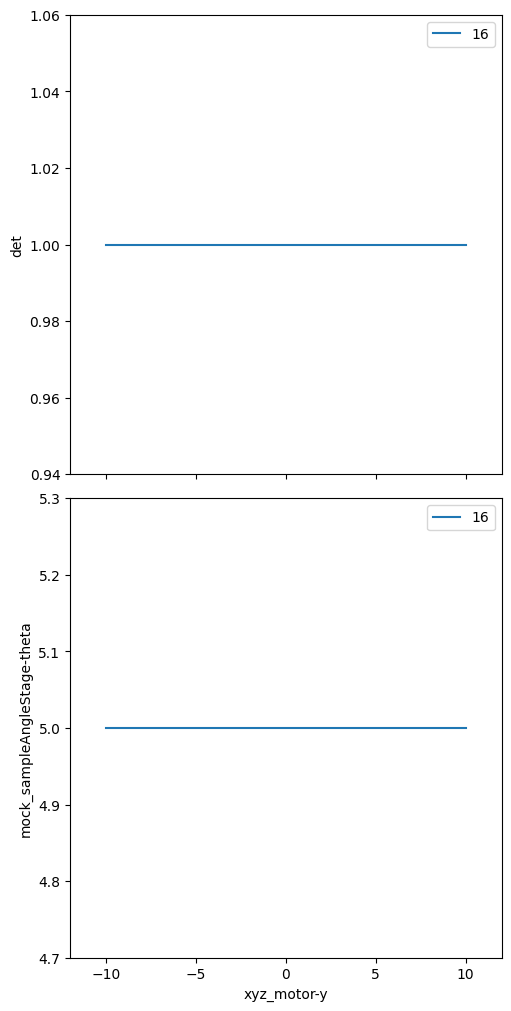

In [25]:
RE(scan([mock_sampleAngleStage.theta, det],xyz_motor.y,-10, 10, xyz_motor.x,-6, 2, xyz_motor.z,2, 10, num = 40),bec)

In [13]:
result = asyncio.create_task(xyz_motor.x.read_configuration())

CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:XVELO", Connecting to: 172.23.241.223:37251, Ignored: 192.168.122.1:37251"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Wed Jun 12 2024 14:57:11.045453543
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:X.EGU", Connecting to: 172.23.241.223:37251, Ignored: 192.168.122.1:37251"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Wed Jun 12 2024 14:57:11.045820516
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:XVELO", Connecting to: 172.23.241.223:37251, Ignored: host.containers.internal:5064"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Wed Jun 12 2024

In [14]:
result

<Task finished name='Task-1391' coro=<StandardReadable.read_configuration() done, defined at /venv/lib/python3.11/site-packages/ophyd_async/core/standard_readable.py:87> result={'xyz_motor-x-motor_egu': {'alarm_severity': 0, 'timestamp': 1718204161.309349, 'value': 'mm'}, 'xyz_motor-x-velocity': {'alarm_severity': 0, 'timestamp': 1718204161.309602, 'value': 0.01}}>

CA.Client.Exception...............................................
    Context: "host.containers.internal:37251"
    Source File: modules/ca/src/client/cac.cpp line 1237
    Current Time: Wed Jun 12 2024 15:00:00.096645701
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:XVELO", Connecting to: 172.23.241.223:5064, Ignored: 192.168.122.1:5064"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Wed Jun 12 2024 15:00:00.178140530
..................................................................
CA.Client.Exception...............................................
    Context: "Channel: "p99-MO-STAGE-02:X.EGU", Connecting to: 172.23.241.223:5064, Ignored: 192.168.122.1:5064"
    Source File: modules/ca/src/client/cac.cpp line 1320
    Current Time: Wed Jun 12 2024 15:00:00.178602890
...............................................................